# Stroke Prediction Dataset
source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/metadata

## Contexte
Selon l'Organisation mondiale de la santé (OMS), l'AVC est la deuxième cause de décès dans le monde, responsable d'environ 11 % du nombre total de décès.
Cet ensemble de données est utilisé pour prédire si un patient est susceptible de subir un AVC en fonction de paramètres d'entrée tels que le sexe, l'âge, diverses maladies et le statut tabagique. Chaque ligne des données fournit des informations pertinentes sur le patient.

## Variables
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
df = pd.read_csv('./dataset/healthcare-dataset-stroke-data.csv')
tmp = df.copy()

In [311]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [312]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

(<AxesSubplot:xlabel='stroke', ylabel='count'>,
 0    4861
 1     249
 Name: stroke, dtype: int64)

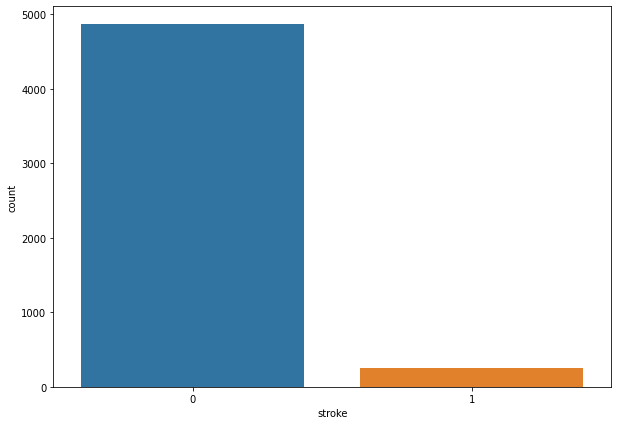

In [313]:
plt.figure(figsize=(10,7))
sns.countplot(x='stroke', data=df), df.stroke.value_counts()

<AxesSubplot:xlabel='stroke', ylabel='count'>

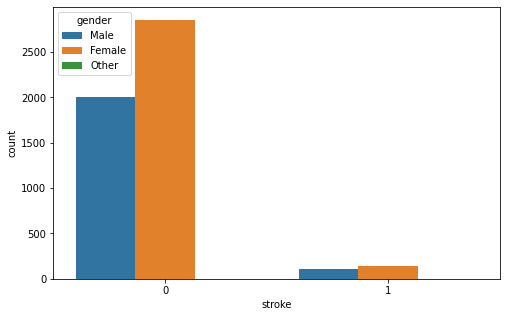

In [314]:
plt.figure(figsize=(8,5))
sns.countplot(x='stroke', hue='gender', data=df)

<Figure size 576x360 with 0 Axes>

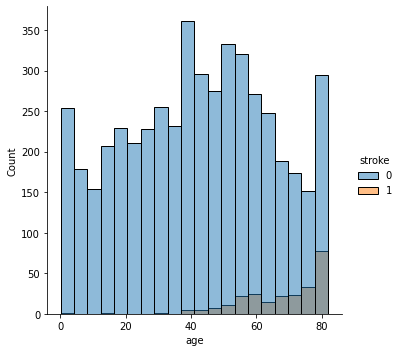

In [315]:
plt.figure(figsize=(8,5))
sns.displot(x='age', hue='stroke', data=df)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

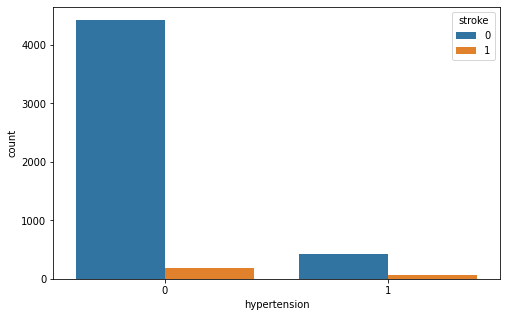

In [316]:
plt.figure(figsize=(8,5))
sns.countplot(x='hypertension', hue='stroke', data=df)

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

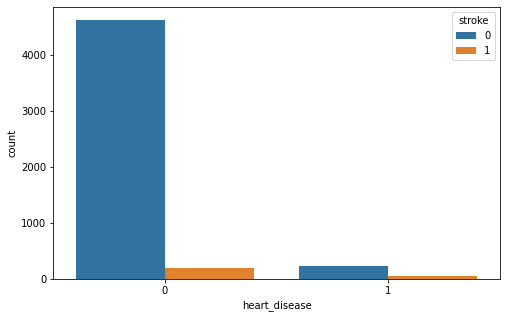

In [317]:
plt.figure(figsize=(8,5))
sns.countplot(x='heart_disease', hue='stroke', data=df)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

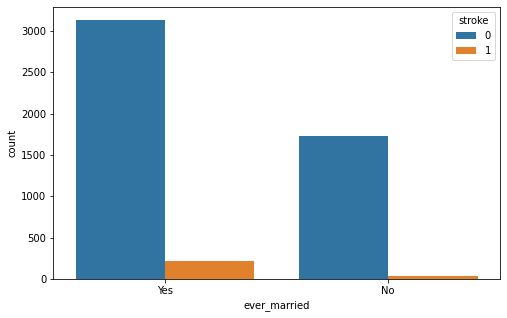

In [318]:
plt.figure(figsize=(8,5))
sns.countplot(x='ever_married', hue='stroke', data=df)

<AxesSubplot:xlabel='work_type', ylabel='count'>

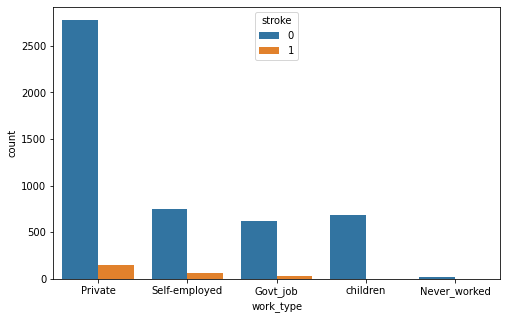

In [319]:
plt.figure(figsize=(8,5))
sns.countplot(x='work_type', hue='stroke', data=df)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

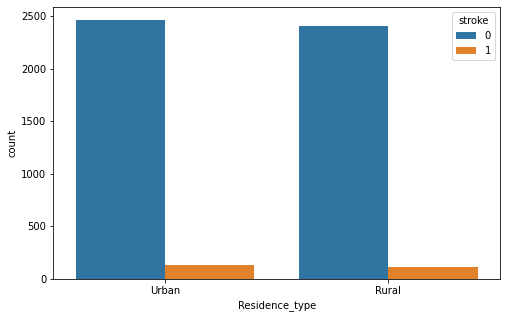

In [320]:
plt.figure(figsize=(8,5))
sns.countplot(x='Residence_type', hue='stroke', data=df)

<Figure size 576x360 with 0 Axes>

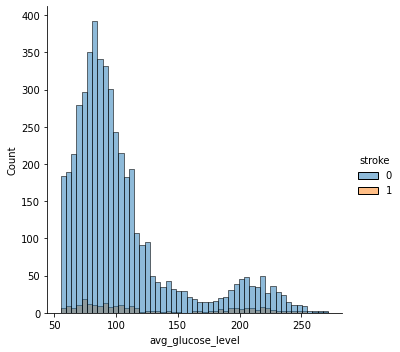

In [321]:
plt.figure(figsize=(8,5))
sns.displot(x='avg_glucose_level', hue='stroke', data=df)

<Figure size 576x360 with 0 Axes>

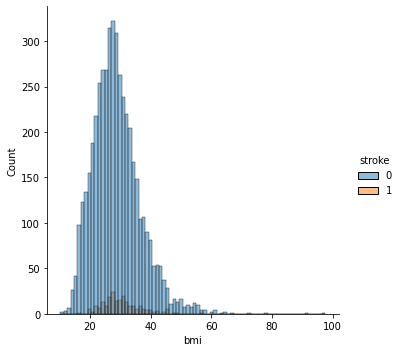

In [322]:
plt.figure(figsize=(8,5))
sns.displot(x='bmi', hue='stroke', data=df)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

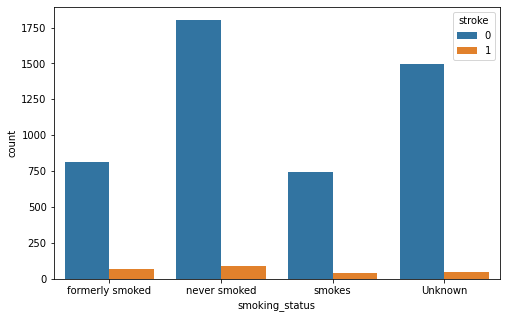

In [323]:
plt.figure(figsize=(8,5))
sns.countplot(x='smoking_status',hue='stroke' , data=df)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [325]:
#check for missing values
df.isnull().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [326]:
#check for outliers
df.drop('id', axis=1).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [327]:
for col in df.columns:
    if col not in ['id','age','bmi']: print(col, '\n', df[col].unique())

gender 
 ['Male' 'Female' 'Other']
hypertension 
 [0 1]
heart_disease 
 [1 0]
ever_married 
 ['Yes' 'No']
work_type 
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type 
 ['Urban' 'Rural']
avg_glucose_level 
 [228.69 202.21 105.92 ...  82.99 166.29  85.28]
smoking_status 
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke 
 [1 0]


In [328]:
#correlation matrix
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

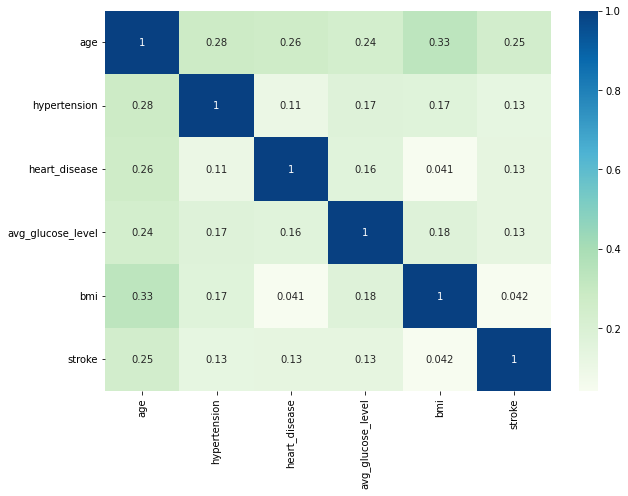

In [329]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop('id', axis=1).corr(), cmap='GnBu', annot=True)

In [330]:
df.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

# Pré-traitement des données

### Gestion des données manquantes

In [331]:

df[np.isnan(df.bmi)].head(15)

#df.isnull().sum()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.0,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.0,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.0,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


<AxesSubplot:xlabel='age', ylabel='bmi'>

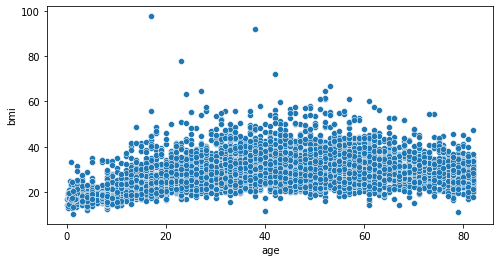

In [332]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='age', y='bmi', data=df[np.isnan(df.bmi) == False])

### création de catégories d'âge dans le but d'utiliser leurs moyennes pour remplacer les bmi manquants (en effet l'âge est la variable avec la plus grande corrélation avec bmi meme si le coeff de corr est faible)

In [333]:

df['age_bins'] = pd.cut(x=df['age'], bins=[0,17,33,50,66,83], labels=[17,33,50,66,83])
bim_moyens_ages = df[np.isnan(df.bmi)==False].groupby('age_bins')['bmi'].mean()
df['bmi'] = df.apply(lambda x: x.bmi if np.isnan(x.bmi)==False else bim_moyens_ages.loc[x.age_bins], axis=1)


In [334]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_bins             0
dtype: int64

In [335]:
df[df.gender=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bins
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,33


In [336]:
# Suppression de la seule ligne avec genre Other
df = df.drop(labels=3116, axis=0)

### var catégorielles en variables dummies et suppression des variables inutiles pour le modèle

In [350]:

df = pd.get_dummies(df, columns=['work_type','smoking_status','Residence_type', 'gender', 'ever_married'], drop_first=True)
df = df.drop('id', axis=1)
df = df.drop('age_bins', axis=1)

### Séparation variable cible et features

In [353]:

y, X = df['stroke'].values, df.drop('stroke',axis=1).values

In [357]:
from sklearn.model_selection import train_test_split

### Split train/test

In [358]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalisation des données

In [361]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Création du modèle

In [365]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2022-05-03 20:29:27.317075: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-03 20:29:27.317155: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [368]:
model = Sequential()
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode=min, verbose=1, patience=7)

2022-05-03 20:39:28.428409: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-03 20:39:28.428462: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-03 20:39:28.428505: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (maa-X705UDR): /proc/driver/nvidia/version does not exist
2022-05-03 20:39:28.428993: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [370]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=256, epochs=500, callbacks=[early_stop])


2022-05-03 20:41:51.473320: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
16/16 [==============================] - 1s 13ms/step - loss: 0.5422 - accuracy: 0.9538 - val_loss: 0.4746 - val_accuracy: 0.9393
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.9542 - val_loss: 0.3707 - val_accuracy: 0.9393
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.9542 - val_loss: 0.3015 - val_accuracy: 0.9393
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9542 - val_loss: 0.2658 - val_accuracy: 0.9393
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9542 - val_loss: 0.2530 - val_accuracy: 0.9393
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2070 - accuracy: 0.9542 - val_loss: 0.2473 - val_accuracy: 0.9393
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.9542 - val_loss: 0.2424 - val_accuracy: 0.9393
Epoch 8/500


## Evaluation du modèle

<AxesSubplot:>

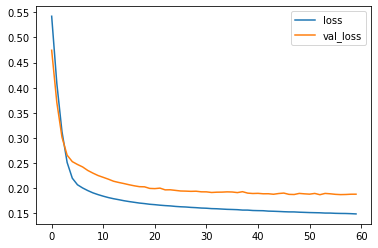

In [373]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [375]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype('int32')
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [376]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report

In [377]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/home/maa/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/maa/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/maa/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [378]:
print(confusion_matrix(y_test, predictions))

[[960   0]
 [ 62   0]]


In [384]:
pd.DataFrame(predictions)[0].unique()

array([0], dtype=int32)

<AxesSubplot:xlabel='stroke', ylabel='count'>

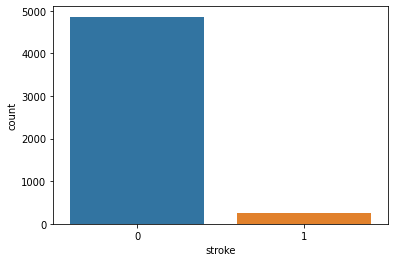

In [388]:
sns.countplot(x='stroke', data=df)